In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data_nm = pd.read_excel('/content/drive/MyDrive/Movie Senitment/Data/NM_comment_clean.xlsx')
data_nm.head()

,Unnamed: 0,Unnamed: 0.1,Movie Name,Label,Main Comment,Comment,Cleaned
0,0.0,0.0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা
1,1.0,1.0,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি
2,2.0,2.0,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি
3,3.0,3.0,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু
4,4.0,4.0,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা


In [3]:
data_pd = pd.read_excel('/content/drive/MyDrive/Movie Senitment/Data/PD_comment_clean.xlsx')
data_pd.head()

,Unnamed: 0,Movie Name,Label,Main Comment,Comment,Cleaned
0,0,Pagla Deewana,ntr,অখাদ্য 😆,অখাদ্য 😆,অখাদ্য
1,1,Pagla Deewana,neg,অসম্ভব ফালতু একটা মুভি।,অসম্ভব ফালতু একটা মুভি।,অসম্ভব ফালতু একটা মুভি
2,2,Pagla Deewana,neg,Number one অচুদা,Number one অচুদা,অচুদা
3,3,Pagla Deewana,pos,ভাল লেগেছেে,ভাল লেগেছেে,ভাল লেগেছে
4,4,Pagla Deewana,ntr,অদ্ভুত,অদ্ভুত,অদ্ভুত


In [4]:
data_nm.drop(columns={'Unnamed: 0','Unnamed: 0.1'},axis=1,inplace=True)
data_pd.drop(columns={'Unnamed: 0'},axis=1,inplace=True)

In [6]:
pip install datacompy

In [7]:
import datacompy

compare = datacompy.Compare(
data_nm,
data_pd,
join_columns='Movie Name',
abs_tol=0.0001,
rel_tol=0,
df1_name='NM',
df2_name='PD')

In [8]:
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns  Rows
0        NM        5  4006
1        PD        5  4243

Column Summary
--------------

Number of columns in common: 5
Number of columns in NM but not in PD: 0
Number of columns in PD but not in NM: 0

Row Summary
-----------

Matched on: movie name
Any duplicates on match values: Yes
Absolute Tolerance: 0.0001
Relative Tolerance: 0
Number of rows in common: 0
Number of rows in NM but not in PD: 4,006
Number of rows in PD but not in NM: 4,243

Number of rows with some compared columns unequal: 0
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 0
Number of columns compared with all values equal: 5
Total number of values which compare unequal: 0

Sample Rows Only in NM (First 10 Columns)
-----------------------------------------

         movie name label                                        

In [9]:
total_data = pd.concat([data_nm, data_pd], axis=0)
total_data

,movie name,label,main comment,comment,cleaned
0,Nishpap Munna,pos,",""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 nice movie""",", ""😎😎😎😎😎😎😎😋😋😋😋😋😋😋 সুন্দর সিনেমা""",সুন্দর সিনেমা
1,Nishpap Munna,ntr,"( নিশী মনি )""","( নিশী মনি )""",নিশী মনি
2,Nishpap Munna,pos,"💜,""I loved movie""","💜, ""আমি সিনেমা পছন্দ করি""",আমি সিনেমা পছন্দ করি
3,Nishpap Munna,neg,"2022,"",""খুব ফালতু""","2022,"",""খুব ফালতু""",খুব ফালতু
4,Nishpap Munna,neg,"24,"" ছামার সিনেমা""","24, ""ছামার সিনেমা""",ছামার সিনেমা
...,...,...,...,...,...
4238,Pagla Deewana,neg,হিজলা ছবি,হিজলা ছবি,হিজলা ছবি
4239,Pagla Deewana,neg,বাজে ছবি,বাজে ছবি,বাজে ছবি
4240,Pagla Deewana,pos,অনেক ভালো,অনেক ভালো,ভালো
4241,Pagla Deewana,ntr,ছবি,ছবি,ছবি


In [10]:
total_data.groupby(['movie name', 'label']).size().reset_index(name='counts')

,movie name,label,counts
0,Nishpap Munna,neg,1293
1,Nishpap Munna,ntr,517
2,Nishpap Munna,pos,2196
3,Pagla Deewana,neg,1527
4,Pagla Deewana,ntr,1033
5,Pagla Deewana,pos,1683


In [11]:
df = total_data.groupby(['movie name', 'label'])['label'].count().reset_index(name='Count').sort_values(['Count'], ascending=False)
df

,movie name,label,Count
2,Nishpap Munna,pos,2196
5,Pagla Deewana,pos,1683
3,Pagla Deewana,neg,1527
0,Nishpap Munna,neg,1293
4,Pagla Deewana,ntr,1033
1,Nishpap Munna,ntr,517


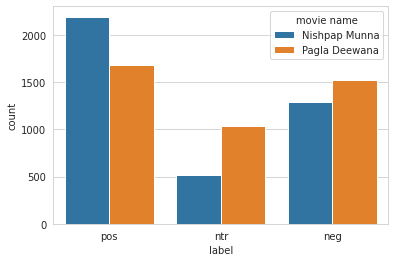

In [12]:
sns.set_style('whitegrid')
sns.countplot( x = 'label', hue="movie name", data = total_data)

In [14]:
total_data.to_excel('total_comment_clean.xlsx')